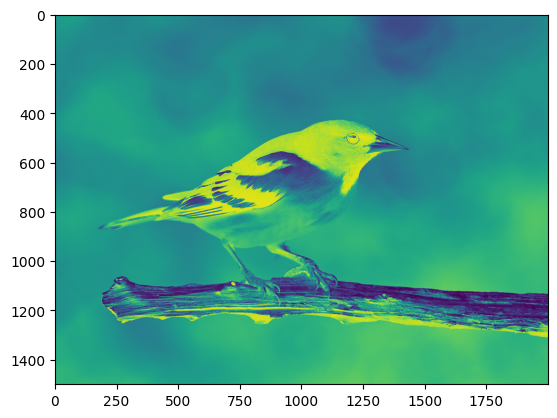

In [2]:
#vd1
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im_1 = np.asarray(img)
#inversion operation
im_2 = 255 - im_1
#convert image 2 from ndarray to image
new_img = Image.fromarray (im_2)
img.show ()
plt.imshow (new_img)
plt.show ()

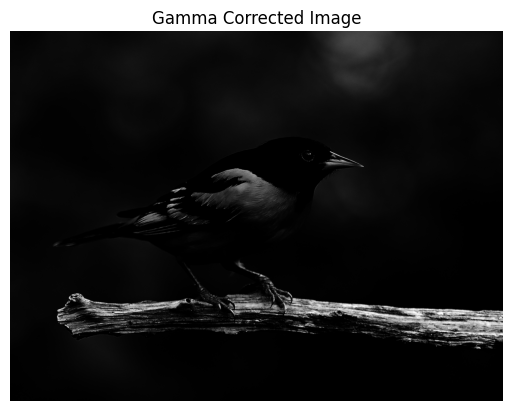

In [ ]:
#vd2

from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im1 = np.asarray(img)

# Khởi tạo gamma
gamma = 5

# Chuyển dữ liệu sang kiểu float để xử lý
b_float = im1.astype(float)

# Tìm giá trị lớn nhất để chuẩn hóa
b_max = np.max(b_float)

# Chuẩn hóa ảnh về khoảng [0, 1]
b_norm = b_float / b_max

# Tính log và áp dụng gamma correction (dạng logarit)
b_log_gamma = np.log(b_norm + 1e-8) * gamma  # thêm epsilon để tránh log(0)

# Lấy mũ và chuyển lại về thang [0, 255]
c = np.exp(b_log_gamma) * 255.0

# Giới hạn giá trị và chuyển về int
c = np.clip(c, 0, 255).astype(np.uint8)

# Tạo ảnh kết quả từ mảng
d = Image.fromarray(c)

# Hiển thị ảnh đầu vào và đầu ra
img.show()
d.show()

# Hoặc hiển thị bằng matplotlib
plt.imshow(d, cmap='gray')
plt.title('Gamma Corrected Image')
plt.axis('off')
plt.show()

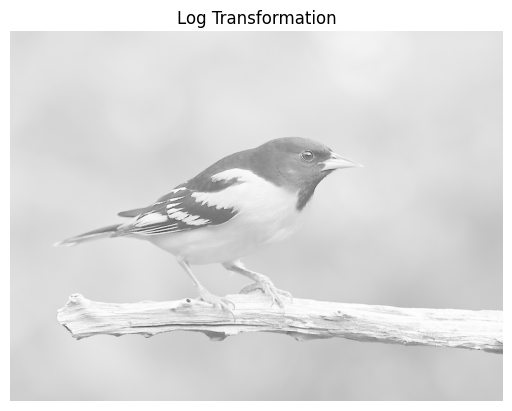

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh và chuyển nó thành ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_1 = np.asarray(img)

# Khởi tạo gamma
gamma = 0.5

# Chuyển dữ liệu sang kiểu float để xử lý
bl = im_1.astype(float)

# Tìm giá trị lớn nhất trong ảnh
b2 = np.max(bl)

# Thực hiện phép biến đổi log (log transformation)
c = (128.0 * np.log(1 + bl)) / np.log(1 + b2)

# Giới hạn giá trị và chuyển về kiểu uint8 (8-bit integer)
cl = np.clip(c, 0, 255).astype(np.uint8)

# Tạo ảnh từ mảng đã chỉnh sửa
d = Image.fromarray(cl)

# Hiển thị ảnh gốc và ảnh đã chỉnh sửa
img.show()  # Hiển thị ảnh gốc
d.show()    # Hiển thị ảnh đã xử lý

# Hiển thị ảnh bằng matplotlib
plt.imshow(d, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')  # Tắt trục
plt.show()

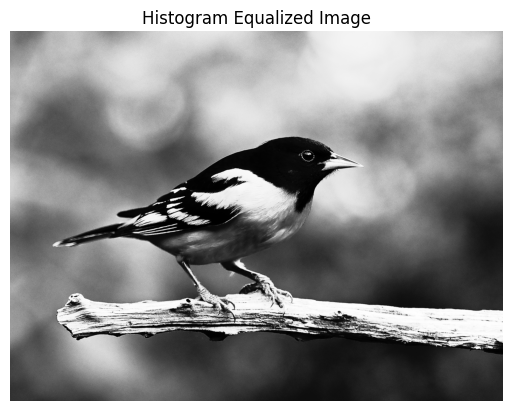

In [16]:
#vd4

from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh và chuyển thành ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
iml = np.asarray(img)

# Chuyển đổi 2D ndarray từ 1D array
bl = iml.flatten()

# Tính histogram và bin
hist, bins = np.histogram(iml, 256, [0, 255])

# Tính Cumulative Distribution Function (CDF)
cdf = hist.cumsum()

# Các nơi mà cdf = 0 sẽ bị mask (bỏ qua)
# Những giá trị còn lại được lưu vào cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# Thực hiện phương pháp histogram equalization
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf_m / den_cdf_m

# Các giá trị đã bị mask trong cdf_m sẽ được thay bằng 0
cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')

# Gán giá trị cdf cho mảng đã flatten
im2 = cdf_m[bl]

# Chuyển đổi 1D array thành 2D
im3 = np.reshape(im2, iml.shape)

# Chuyển đổi im3 thành ảnh
im4 = Image.fromarray(im3)

# Hiển thị ảnh gốc và ảnh đã xử lý
img.show()
im4.show()

# Hiển thị ảnh sử dụng matplotlib
plt.imshow(im4, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')  # Tắt trục
plt.show()


0 255


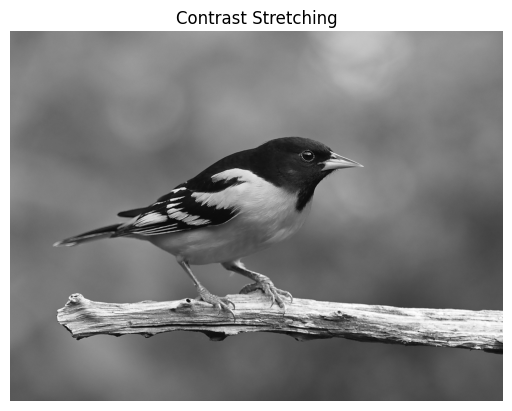

In [18]:
#vd5
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh và chuyển thành ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
iml = np.asarray(img)

# Tìm giá trị pixel tối đa và tối thiểu
b = iml.max()
a = iml.min()
print(a, b)

# Chuyển mảng iml thành float để thực hiện phép toán
C = iml.astype(float)

# Thực hiện phép biến đổi giãn tương phản (contrast stretching)
im2 = 255 * (C - a) / (b - a)

# Chuyển đổi từ ndarray về ảnh
im3 = Image.fromarray(im2.astype(np.uint8))

# Hiển thị ảnh gốc và ảnh đã xử lý
img.show()
im3.show()

# Hiển thị ảnh bằng matplotlib
plt.imshow(im3, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')  # Tắt trục
plt.show()

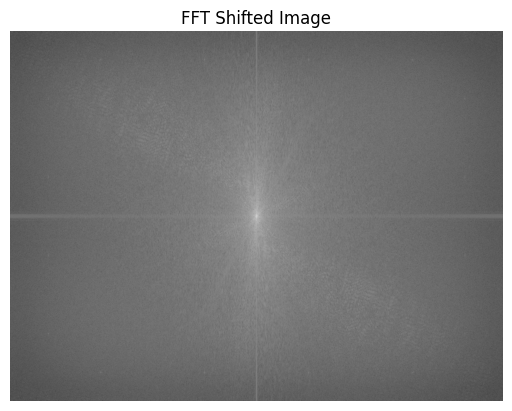

In [20]:
#vd6

from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pylab as plt

# Mở ảnh và chuyển thành ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
iml = np.asarray(img)

# Thực hiện phép toán FFT
c = np.abs(scipy.fftpack.fft2(iml))

# Dịch chuyển Fourier frequency image để chuyển phần thấp tần số về giữa
d = scipy.fftpack.fftshift(c)

# Chuyển ảnh từ mảng numpy về lại ảnh
d_log = np.log(d + 1)  # Áp dụng log để tăng cường độ sáng của tần số thấp
d_log = np.uint8(d_log / np.max(d_log) * 255)  # Chuẩn hóa về phạm vi [0, 255]

# Tạo ảnh từ mảng đã xử lý
im3 = Image.fromarray(d_log)

# Hiển thị ảnh gốc và ảnh sau khi xử lý FFT
img.show()   # Hiển thị ảnh gốc
im3.show()   # Hiển thị ảnh đã xử lý

# Hiển thị ảnh bằng matplotlib
plt.imshow(im3, cmap='gray')
plt.title('FFT Shifted Image')
plt.axis('off')  # Tắt trục
plt.show()

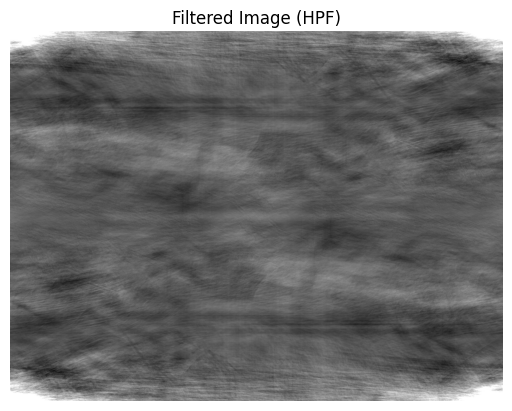

In [4]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển thành ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
iml = np.asarray(img)

# Thực hiện phép toán FFT
c = np.abs(scipy.fftpack.fft2(iml))

# Dịch chuyển ảnh Fourier frequency để đưa tần số thấp về giữa
d = scipy.fftpack.fftshift(c)

# Khởi tạo các biến cho hàm convolution
M = d.shape[0]  # chiều cao
N = d.shape[1]  # chiều rộng

# Khởi tạo bộ lọc Butterworth Highpass Filter (BHPF)
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
d_0 = 30.0  # bán kính cắt (cut-off radius)
t1 = 1  # bậc của BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1  # bậc tiếp theo (nếu cần thiết)

# Tính toán BHPF (Highpass Filter)
for i in range(M):
    for j in range(N):
        rl = (i - center1) ** 2 + (j - center2) ** 2  # khoảng cách Euclidean từ gốc
        r = math.sqrt(rl)
        
        # Sử dụng bán kính cắt để loại bỏ tần số thấp
        if r > d_0:
            H[i, j] = 1 - (1 / (1 + (r / d_0) ** t2))  # Highpass filter

# Chuyển đổi H từ ndarray thành ảnh
H = H.astype(float)
H = Image.fromarray(H)

# Thực hiện phép convolution
con = d * H  # áp dụng BHPF vào ảnh Fourier
# Tính toán độ lớn của inverse FFT
e = np.abs(scipy.fftpack.ifft2(con))

# Chuyển đổi e từ ndarray thành ảnh
e = e.astype(float)
e = np.clip(e, 0, 255)  # Giới hạn giá trị pixel về phạm vi [0, 255]
im3 = Image.fromarray(e.astype(np.uint8))

# Hiển thị ảnh gốc và ảnh đã xử lý
img.show()
im3.show()

# Hiển thị ảnh bằng matplotlib
plt.imshow(im3, cmap='gray')
plt.title('Filtered Image (HPF)')
plt.axis('off')  # Tắt trục
plt.show()


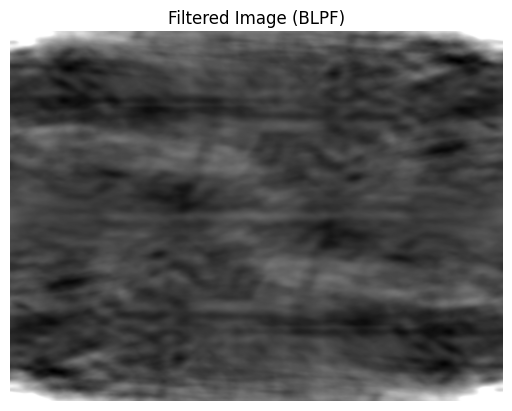

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển thành ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
iml = np.asarray(img)

# Thực hiện phép toán FFT
c = np.abs(scipy.fftpack.fft2(iml))

# Dịch chuyển ảnh Fourier frequency để đưa tần số thấp về giữa
d = scipy.fftpack.fftshift(c)

# Khởi tạo các biến cho hàm convolution
M = d.shape[0]  # chiều cao
N = d.shape[1]  # chiều rộng

# Khởi tạo bộ lọc Butterworth Lowpass Filter (BLPF)
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
d_0 = 30.0  # bán kính cắt (cut-off radius)
t1 = 1  # bậc của BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1  # bậc tiếp theo (nếu cần thiết)

# Tính toán BLPF
for i in range(M):
    for j in range(N):
        rl = (i - center1) ** 2 + (j - center2) ** 2  # khoảng cách Euclidean từ gốc
        r = math.sqrt(rl)
        
        # Sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0) ** t2)

# Chuyển đổi H từ ndarray thành ảnh
H = H.astype(float)
H = Image.fromarray(H)

# Thực hiện phép convolution
con = d * H  # áp dụng BLPF vào ảnh Fourier
# Tính toán độ lớn của inverse FFT
e = np.abs(scipy.fftpack.ifft2(con))

# Chuyển đổi e từ ndarray thành ảnh
e = e.astype(float)
e = np.clip(e, 0, 255)  # Giới hạn giá trị pixel về phạm vi [0, 255]
im3 = Image.fromarray(e.astype(np.uint8))

# Hiển thị ảnh gốc và ảnh đã xử lý
img.show()
im3.show()

# Hiển thị ảnh bằng matplotlib
plt.imshow(im3, cmap='gray')
plt.title('Filtered Image (BLPF)')
plt.axis('off')  # Tắt trục
plt.show()
